<a href="https://colab.research.google.com/github/thotasriharsha/STML/blob/main/sriharsha_2303A52159_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Salary Based On Years Of Experience (Regression)
Name:T.sriharsha
HT NO:2303A52159
Batch No:36

Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Salary_dataset.csv")



In [ ]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
X = data[['YearsExperience']]
y = data['Salary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error (MSE): 49830096.855908394
R-squared (R²) Score: 0.9024461774180497


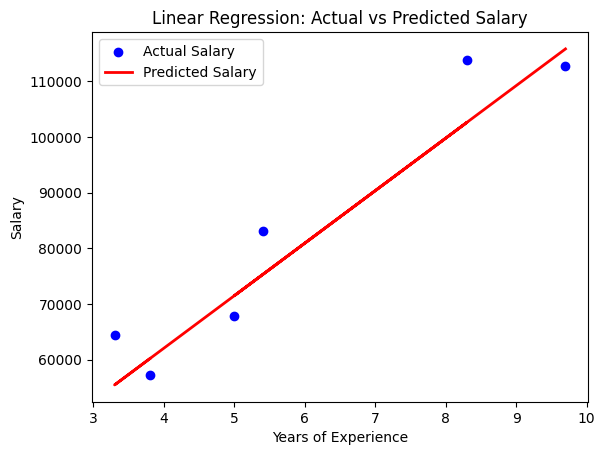

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

# Visualize the regression results
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Actual vs Predicted Salary')
plt.legend()
plt.show()


KNN Model

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate R-squared score (standard regression performance metric)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE) as another performance measure
mae = mean_absolute_error(y_test, y_pred)

# Define a custom accuracy metric (percentage of predictions within 10% of actual value)
threshold = 0.10  # 10% tolerance
accuracy_within_threshold = sum(abs(y_pred - y_test) / y_test <= threshold) / len(y_test) * 100

# Print metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"Accuracy within {threshold*100}% of actual values: {accuracy_within_threshold:.2f}%")


R-squared (R²): 0.9024461774180497
Mean Absolute Error (MAE): 6286.453830757745
Mean Squared Error (MSE): 49830096.855908394
Accuracy within 10.0% of actual values: 83.33%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_probs = model.predict(X_test)
mse_log = mean_squared_error(y_test, y_pred_probs)
mae_log = mean_absolute_error(y_test,y_pred_probs)
print(f"Linear Regression - MSE: {mse_log}, MAE: {mae_log}")

Linear Regression - MSE: 49830096.855908394, MAE: 6286.453830757745


Best k based on MSE: 3 (MSE: 30279360.94)
Best k based on R²: 3 (R²: 0.94)
Best k based on Accuracy: 3 (Accuracy: 83.33%)
KNN Regressor - MSE: 398688364.18, R² Score: 0.22


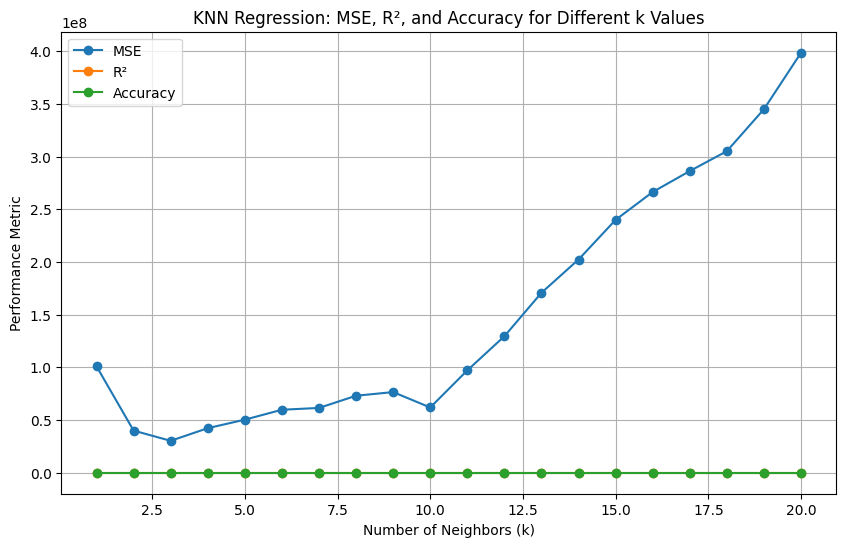

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test a range of k values
k_values = range(1, 21)  # Range of k values to test
mse_list = []
r2_list = []
accuracy_list = []

# Define a custom accuracy function
def calculate_accuracy(y_true, y_pred, threshold=0.10):
    """
    Calculate the percentage of predictions within the threshold.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    within_threshold = np.abs(y_pred - y_true) / y_true <= threshold
    accuracy = np.mean(within_threshold) * 100
    return accuracy

for k in k_values:
    # Initialize and train the KNN regressor
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred, threshold=0.10)  # 10% threshold for accuracy

    mse_list.append(mse)
    r2_list.append(r2)
    accuracy_list.append(accuracy)

# Find the best k based on MSE and R²
best_k_mse = k_values[mse_list.index(min(mse_list))]
best_k_r2 = k_values[r2_list.index(max(r2_list))]
best_k_accuracy = k_values[accuracy_list.index(max(accuracy_list))]

# Print the best k values for each metric
print(f"Best k based on MSE: {best_k_mse} (MSE: {min(mse_list):.2f})")
print(f"Best k based on R²: {best_k_r2} (R²: {max(r2_list):.2f})")
print(f"Best k based on Accuracy: {best_k_accuracy} (Accuracy: {max(accuracy_list):.2f}%)")
print(f"KNN Regressor - MSE: {mse:.2f}, R² Score: {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_list, marker='o', label='MSE')
plt.plot(k_values, r2_list, marker='o', label='R²')
plt.plot(k_values, accuracy_list, marker='o', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Performance Metric')
plt.title('KNN Regression: MSE, R², and Accuracy for Different k Values')
plt.legend()
plt.grid()
plt.show()


Random Forest

Mean Squared Error (MSE): 63721129.71
Mean Absolute Error (MAE): 6872.01
R²: 0.88
R² (Accuracy): 0.88


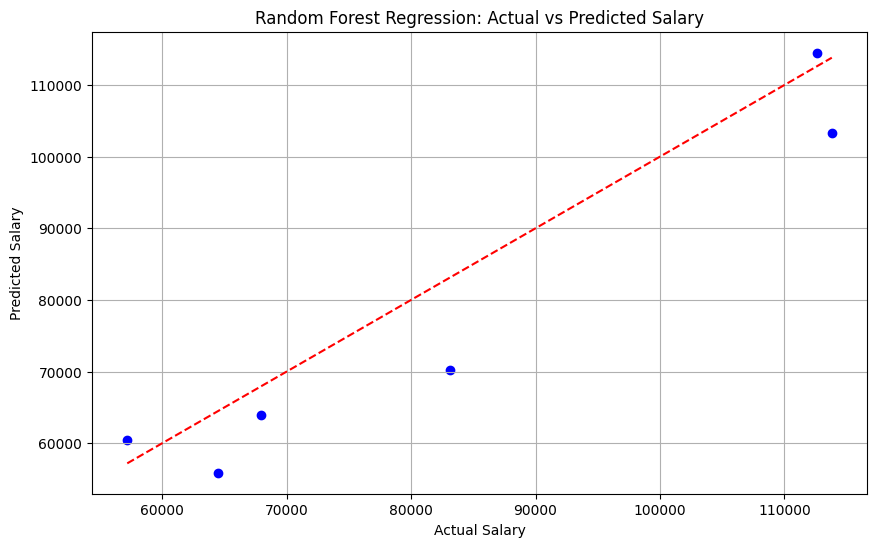

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Define a custom accuracy function
def calculate_accuracy(y_true, y_pred, threshold=0.10):
    """
    Calculate the percentage of predictions within a given threshold of actual values.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    within_threshold = np.abs(y_pred - y_true) / y_true <= threshold
    accuracy = np.mean(within_threshold) * 100  # Convert to percentage
    return accuracy

# Calculate accuracy within a 10% margin
accuracy = calculate_accuracy(y_test, y_pred, threshold=0.10)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")
print(f"R² (Accuracy): {r2:.2f}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest Regression: Actual vs Predicted Salary')
plt.grid(True)
plt.show()


DECISION TREE

Mean Squared Error (MSE): 101047709.83
Mean Absolute Error (MAE): 8640.17
R² (Accuracy): 0.80


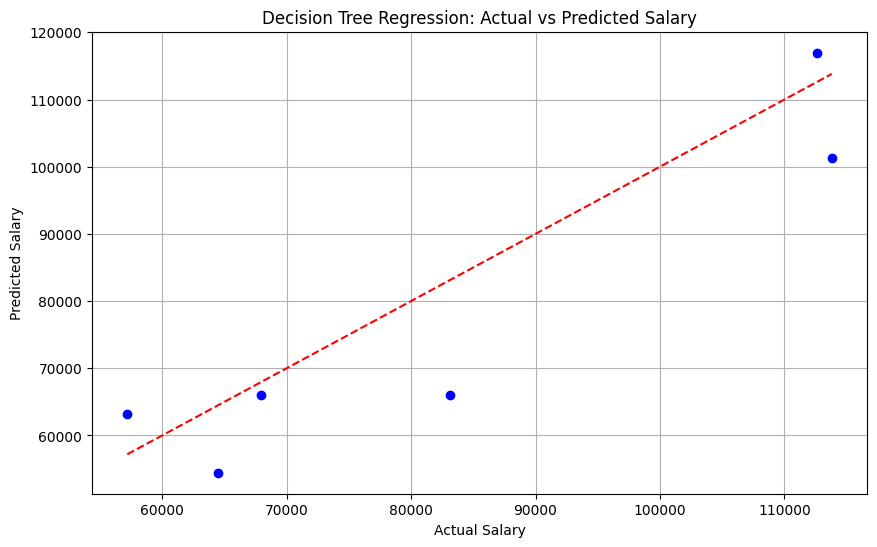

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² (Accuracy): {r2:.2f}")


# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Decision Tree Regression: Actual vs Predicted Salary')
plt.grid(True)
plt.show()


SVR

Mean Squared Error (MSE): 54315402.23
Mean Absolute Error (MAE): 5809.84
R² (Accuracy): 0.89


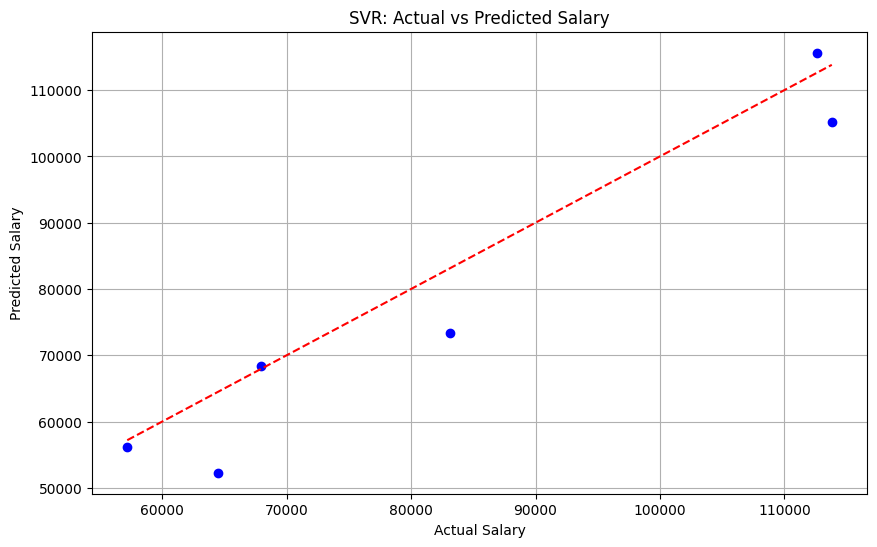

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape target variable for scaling
y = y.values.reshape(-1, 1)

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize the SVR model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform predictions and target back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² (Accuracy): {r2:.2f}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, color='blue')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('SVR: Actual vs Predicted Salary')
plt.grid(True)
plt.show()


Evulate Models Using RMSE and MAE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

# Initialize results dictionary
results = {}

# Feature scaling for SVR and KNN
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Train and evaluate models
for name, model in models.items():
    if name in ['SVR', 'KNN']:
        # Train on scaled data for SVR and KNN
        model.fit(X_train_scaled, y_train_scaled)
        y_pred_scaled = model.predict(X_test_scaled)
        # Inverse transform predictions to original scale
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    else:
        # Train on original data for other models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae}

# Print results
print("Model Evaluation Results (RMSE and MAE):")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}")


Model Evaluation Results (RMSE and MAE):
Linear Regression: RMSE = 7059.04, MAE = 6286.45
Decision Tree: RMSE = 10052.25, MAE = 8640.17
Random Forest: RMSE = 7982.55, MAE = 6872.01
KNN: RMSE = 7096.29, MAE = 6091.10
SVR: RMSE = 7371.00, MAE = 5800.14


Prediction and Confidence intervals

      Actual      Predicted  Lower Confidence  Upper Confidence  \
27  112636.0  115791.210113     107789.932635     123792.487591   
15   67939.0   71499.278095      63498.000617      79500.555573   
23  113813.0  102597.868661      94596.591183     110599.146139   
17   83089.0   75268.804224      67267.526746      83270.081702   
8    64446.0   55478.792045      47477.514568      63480.069523   
9    57190.0   60190.699707      52189.422229      68191.977185   

    Lower Prediction  Upper Prediction  
27      90937.803858     140644.616368  
15      50096.091102      92902.465088  
23      79894.838850     125300.898472  
17      54024.861080      96512.747368  
8       32473.421923      78484.162168  
9       37802.907764      82578.491650  


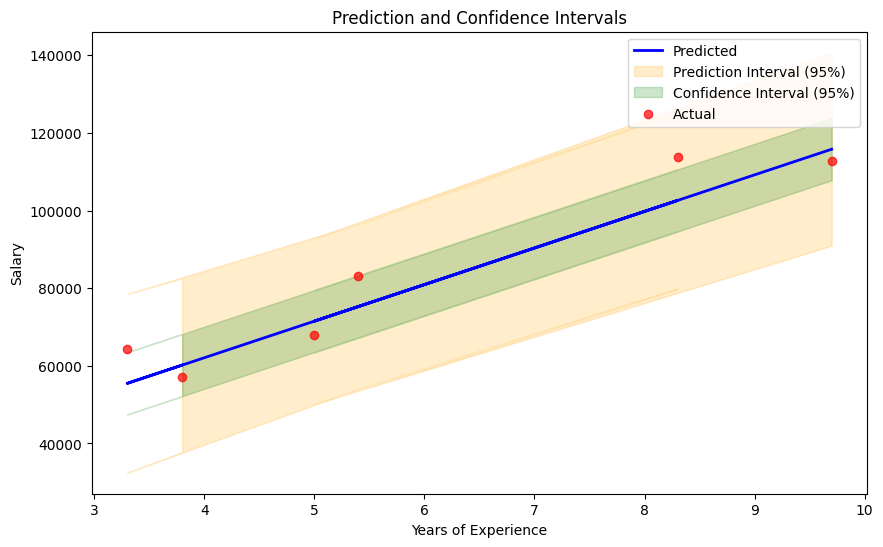

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and standard deviation of residuals
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Number of observations in the test set
n = len(y_test)

# Calculate prediction intervals
alpha = 0.05  # 95% confidence level
t_value = t.ppf(1 - alpha / 2, df=n - 2)  # t-distribution critical value
se_pred = rmse * np.sqrt(1 + 1 / n + (X_test['YearsExperience'] - np.mean(X_test['YearsExperience']))**2 / np.sum((X_test['YearsExperience'] - np.mean(X_test['YearsExperience']))**2))
se_pred_values = se_pred.values
# Compute confidence and prediction intervals
confidence_interval = t_value * rmse / np.sqrt(n)
lower_confidence = y_pred - confidence_interval
upper_confidence = y_pred + confidence_interval

lower_prediction = y_pred - t_value * se_pred.values
upper_prediction = y_pred + t_value * se_pred.values

# Create a DataFrame to display results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Lower Confidence': lower_confidence.flatten(),
    'Upper Confidence': upper_confidence.flatten(),
    'Lower Prediction': lower_prediction.flatten(),
    'Upper Prediction': upper_prediction.flatten()
})

# Display results
print(results)

# Example: Visualizing the prediction intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_pred, label='Predicted', color='blue', linewidth=2)
plt.fill_between(
    X_test['YearsExperience'].values,
    lower_prediction.flatten(),
    upper_prediction.flatten(),
    color='orange',
    alpha=0.2,
    label='Prediction Interval (95%)'
)
plt.fill_between(
    X_test['YearsExperience'].values,
    lower_confidence.flatten(),
    upper_confidence.flatten(),
    color='green',
    alpha=0.2,
    label='Confidence Interval (95%)'
)
plt.scatter(X_test['YearsExperience'], y_test, label='Actual', color='red', alpha=0.7)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction and Confidence Intervals')
plt.legend()
plt.show()


Learning Curves

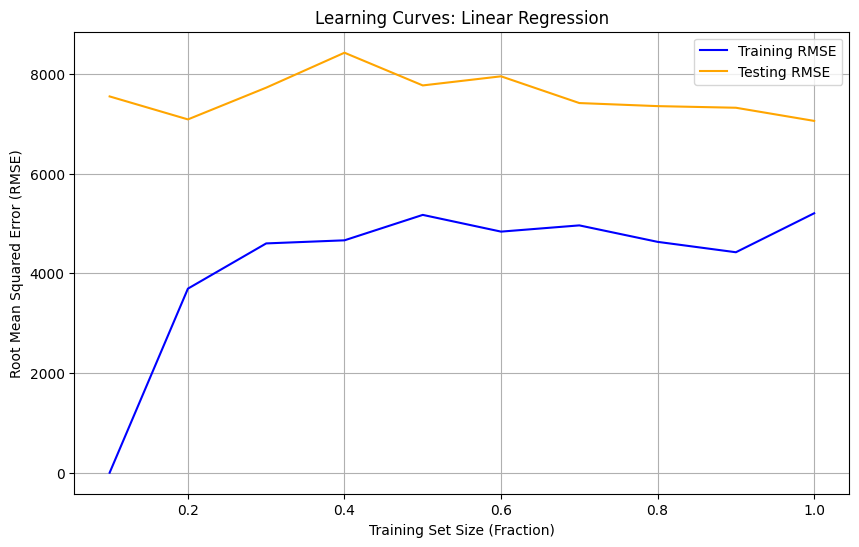


Prediction Intervals for Linear Regression:
     Actual      Predicted       Lower PI       Upper PI
0  112636.0  115791.210113  104266.709907  127315.710318
1   67939.0   71499.278095   60477.905183   82520.651006
2  113813.0  102597.868661   91340.333933  113855.403388
3   83089.0   75268.804224   64249.289511   86288.318937
4   64446.0   55478.792045   44355.236015   66602.348076
5   57190.0   60190.699707   49112.933513   71268.465901


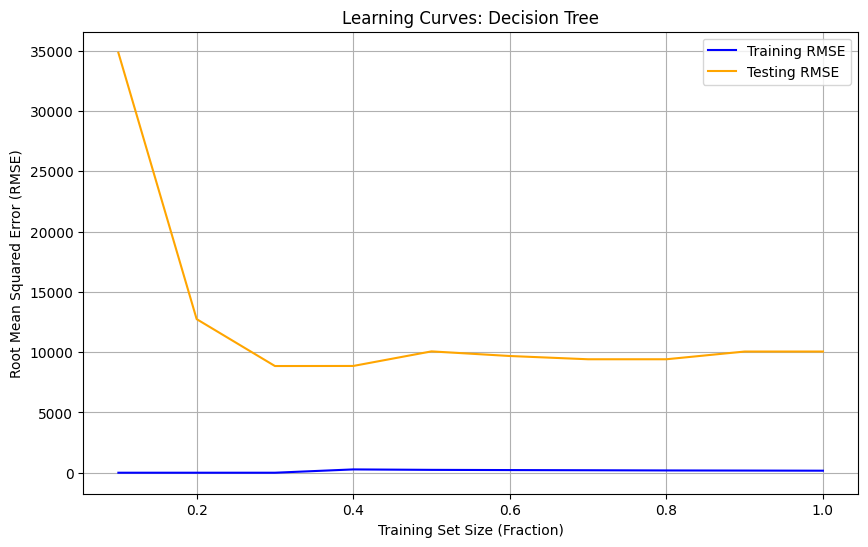


Prediction Intervals for Decision Tree:
     Actual  Predicted       Lower PI       Upper PI
0  112636.0   116970.0  116598.397588  117341.602412
1   67939.0    66030.0   65674.620705   66385.379295
2  113813.0   101303.0  100940.005771  101665.994229
3   83089.0    66030.0   65674.680622   66385.319378
4   64446.0    54446.0   54087.325855   54804.674145
5   57190.0    63219.0   62861.802328   63576.197672


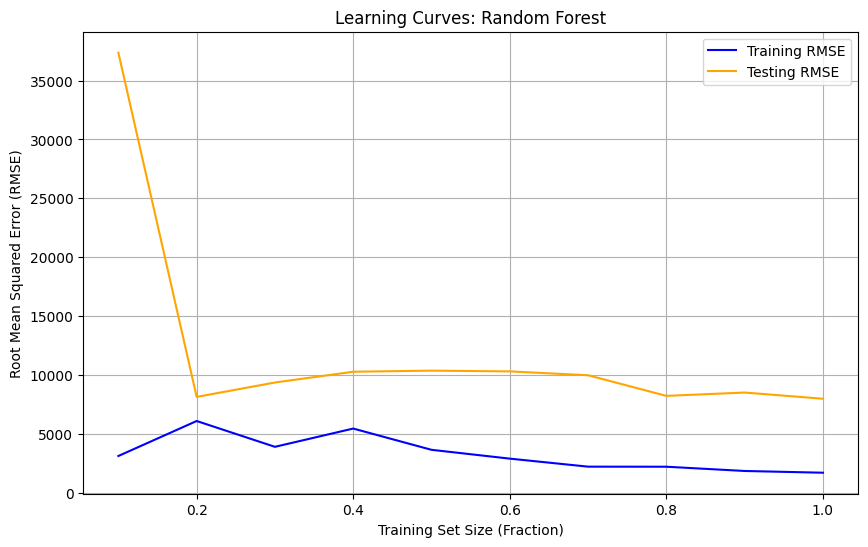


Prediction Intervals for Random Forest:
     Actual      Predicted       Lower PI       Upper PI
0  112636.0  114509.020000  110744.641712  118273.398288
1   67939.0   63907.880000   60307.843890   67507.916110
2  113813.0  103274.550000   99597.373676  106951.726324
3   83089.0   70153.120000   66553.690854   73752.549146
4   64446.0   55881.116667   52247.703324   59514.530009
5   57190.0   60478.692690   56860.236202   64097.149179


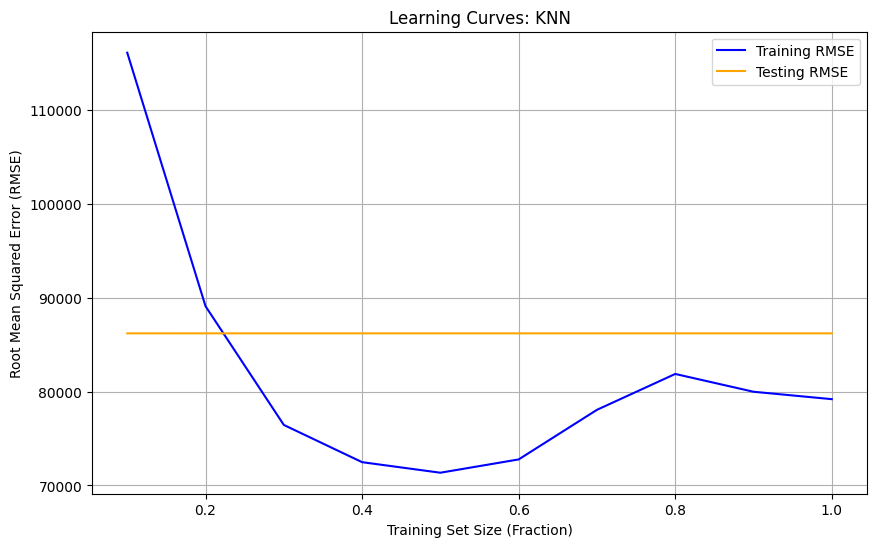


Prediction Intervals for KNN:
     Actual  Predicted       Lower PI       Upper PI
0  112636.0   1.340798 -175303.487572  175306.169168
1   67939.0  -0.384778 -167651.896962  167651.127406
2  113813.0   1.127061 -171242.758400  171245.012522
3   83089.0  -0.018506 -167623.264722  167623.227710
4   64446.0  -0.611663 -169206.481426  169205.258099
5   57190.0  -0.510745 -168509.848823  168508.827333


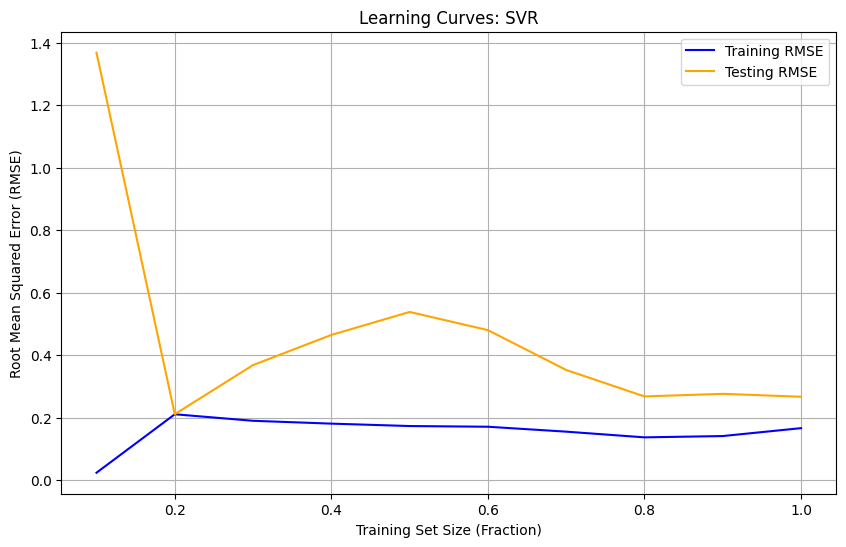


Prediction Intervals for SVR:
     Actual  Predicted  Lower PI  Upper PI
0  1.389973   1.493079  1.125375  1.860783
1 -0.226781  -0.208835 -0.560486  0.142816
2  1.432547   1.116080  0.756894  1.475267
3  0.321216  -0.027980 -0.379572  0.323611
4 -0.353128  -0.791707 -1.146619 -0.436796
5 -0.615588  -0.649090 -1.002540 -0.295640


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import t

# Load the dataset
file_path = '/content/Salary_dataset.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Remove unnecessary column
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Define features and target
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

# Feature scaling for SVR and KNN
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Function to compute learning curves and prediction intervals
def plot_learning_curves_with_intervals(model, X_train, y_train, X_test, y_test, model_name, confidence=0.95, scaled=False):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    test_errors = []

    y_train_unscaled = y_train if not scaled else scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_unscaled = y_test if not scaled else scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    for train_size in train_sizes:
        subset_X_train = X_train[:int(len(X_train) * train_size)]
        subset_y_train = y_train[:int(len(y_train) * train_size)]
         # Adjust n_neighbors for KNN based on training subset size
        if isinstance(model, KNeighborsRegressor):
            n_neighbors = min(model.n_neighbors, len(subset_X_train)) # ensures n_neighbors does not exceed samples
            model.n_neighbors = n_neighbors

        #feature scaled
        if scaled:
          subset_X_train = scaler_X.fit_transform(subset_X_train)
          subset_y_train = scaler_y.fit_transform(subset_y_train.reshape(-1,1)).flatten()
        # Train the model
        model.fit(subset_X_train, subset_y_train)

        # Calculate predictions
        y_train_pred = model.predict(subset_X_train)
        y_test_pred = model.predict(X_test)

        if scaled:
            y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
            y_test_pred = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

        # Residuals and RMSE
        residuals = y_train_unscaled[:len(subset_y_train)] - y_train_pred
        rmse = np.sqrt(mean_squared_error(y_train_unscaled[:len(subset_y_train)], y_train_pred))

        train_errors.append(mean_squared_error(y_train_unscaled[:len(subset_y_train)], y_train_pred))
        test_errors.append(mean_squared_error(y_test_unscaled, y_test_pred))

    # Final prediction interval calculation on the entire test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if scaled:
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    residuals = y_train_unscaled - model.predict(X_train) if not scaled else \
                y_train_unscaled - scaler_y.inverse_transform(model.predict(X_train).reshape(-1, 1)).flatten()
    rmse = np.sqrt(mean_squared_error(y_train_unscaled, model.predict(X_train) if not scaled else \
                scaler_y.inverse_transform(model.predict(X_train).reshape(-1, 1)).flatten()))

    n = len(X_train)
    t_value = t.ppf(1 - (1 - confidence) / 2, df=n - 2)
    mean_X = np.mean(X_train, axis=0)
    se_pred = rmse * np.sqrt(1 + 1 / n + (X_test - mean_X) ** 2 / np.sum((X_train - mean_X) ** 2, axis=0))

    lower_bound = y_pred - t_value * se_pred.flatten()
    upper_bound = y_pred + t_value * se_pred.flatten()

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.sqrt(train_errors), label='Training RMSE', color='blue')
    plt.plot(train_sizes, np.sqrt(test_errors), label='Testing RMSE', color='orange')
    plt.title(f'Learning Curves: {model_name}')
    plt.xlabel('Training Set Size (Fraction)')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print prediction intervals
    results = pd.DataFrame({
        'Actual': y_test_unscaled,
        'Predicted': y_pred,
        'Lower PI': lower_bound,
        'Upper PI': upper_bound
    })
    print(f"\nPrediction Intervals for {model_name}:")
    print(results)

# Plot learning curves and calculate intervals for each model
for name, model in models.items():
    if name in ['SVR', 'KNN']:
        plot_learning_curves_with_intervals(
            model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, name, scaled=True
        )
    else:
        plot_learning_curves_with_intervals(
            model, X_train.values, y_train.values, X_test.values, y_test.values, name
        )
